# 实时动态作图

## 问题描述

有一列不断增长的数据序列，想要做出每次更新数据的动态图。

refer to [Trevor Boyd Smith @ Velimir Mlaker](https://stackoverflow.com/questions/11874767/real-time-plotting-in-while-loop-with-matplotlib) for more details.

In [1]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

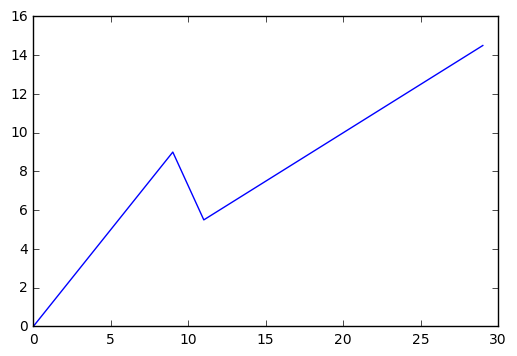

In [5]:
x = range(10)
y = range(10)
plt.plot(x, y)
for i in range(11,30):
    x.append(i)
    y.append(i*0.5)
    plt.gca().lines[0].set_xdata(x)
    plt.gca().lines[0].set_ydata(y)
    plt.gca().relim()
    plt.gca().autoscale_view()
    plt.pause(0.5)
plt.show() # cannot display the animation in the notebook, you can run it by yourself.

因为对 `plt` 也不是很熟悉，所以下面逐条学习上面的代码

### 第一步`help('matplotlib.pyplot.gca')`

In [16]:
help('matplotlib.pyplot.gca')

Help on function gca in matplotlib.pyplot:

matplotlib.pyplot.gca = gca(**kwargs)
    Get the current :class:`~matplotlib.axes.Axes` instance on the
    current figure matching the given keyword args, or create one.
    
    Examples
    ---------
    To get the current polar axes on the current figure::
    
        plt.gca(projection='polar')
    
    If the current axes doesn't exist, or isn't a polar one, the appropriate
    axes will be created and then returned.
    
    See Also
    --------
    matplotlib.figure.Figure.gca : The figure's gca method.



文档表示它是 `matplotlib.axes.Axes`的实例。于是进行第二步

### 第二步`help('matplotlib.axes.Axes')`

In [17]:
help('matplotlib.axes.Axes')

Help on class Axes in matplotlib.axes:

matplotlib.axes.Axes = class Axes(matplotlib.axes._base._AxesBase)
 |  The :class:`Axes` contains most of the figure elements:
 |  :class:`~matplotlib.axis.Axis`, :class:`~matplotlib.axis.Tick`,
 |  :class:`~matplotlib.lines.Line2D`, :class:`~matplotlib.text.Text`,
 |  :class:`~matplotlib.patches.Polygon`, etc., and sets the
 |  coordinate system.
 |  
 |  The :class:`Axes` instance supports callbacks through a callbacks
 |  attribute which is a :class:`~matplotlib.cbook.CallbackRegistry`
 |  instance.  The events you can connect to are 'xlim_changed' and
 |  'ylim_changed' and the callback will be called with func(*ax*)
 |  where *ax* is the :class:`Axes` instance.
 |  
 |  Method resolution order:
 |      Axes
 |      matplotlib.axes._base._AxesBase
 |      matplotlib.artist.Artist
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  acorr(ax, *args, **kwargs)
 |      Plot the autocorrelation of `x`.
 |      
 |      Parameters
 |

发现有这么一段话

> use :meth:`matplotlib.axes.Axes.relim` prior to calling autoscale_view.

所以可以解释

```
plt.gca().relim()
plt.gca().autoscale_view()
```

继续搜索`lines`，发现其包含的元素有`matplotlib.lines.Line2D`，于是

### 第三步`help('matplotlib.lines.Line2D')`

In [18]:
help('matplotlib.lines.Line2D')

Help on class Line2D in matplotlib.lines:

matplotlib.lines.Line2D = class Line2D(matplotlib.artist.Artist)
 |  A line - the line can have both a solid linestyle connecting all
 |  the vertices, and a marker at each vertex.  Additionally, the
 |  drawing of the solid line is influenced by the drawstyle, e.g., one
 |  can create "stepped" lines in various styles.
 |  
 |  Method resolution order:
 |      Line2D
 |      matplotlib.artist.Artist
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __getstate__(self)
 |  
 |  __init__(self, xdata, ydata, linewidth=None, linestyle=None, color=None, marker=None, markersize=None, markeredgewidth=None, markeredgecolor=None, markerfacecolor=None, markerfacecoloralt=u'none', fillstyle=None, antialiased=None, dash_capstyle=None, solid_capstyle=None, dash_joinstyle=None, solid_joinstyle=None, pickradius=5, drawstyle=None, markevery=None, **kwargs)
 |      Create a :class:`~matplotlib.lines.Line2D` instance with *x*
 |      and *y* da

虽然顺利搜索到 `set_xdata`，但与源码中的调用还是有点区别，我们没有用到 `.Line2D`，文档称  `matplotlib.lines.Line2D` 是 `matplotlib.lines` 中的类，所以

### 第四步 `help('matplotlib.lines')`

In [21]:
help('matplotlib.lines')

Help on module matplotlib.lines in matplotlib:

NAME
    matplotlib.lines

FILE
    /home/weiya/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py

DESCRIPTION
    This module contains all the 2D line class which can draw with a
    variety of line styles, markers and colors.

CLASSES
    __builtin__.object
        VertexSelector
    matplotlib.artist.Artist(__builtin__.object)
        Line2D
    
    class Line2D(matplotlib.artist.Artist)
     |  A line - the line can have both a solid linestyle connecting all
     |  the vertices, and a marker at each vertex.  Additionally, the
     |  drawing of the solid line is influenced by the drawstyle, e.g., one
     |  can create "stepped" lines in various styles.
     |  
     |  Method resolution order:
     |      Line2D
     |      matplotlib.artist.Artist
     |      __builtin__.object
     |  
     |  Methods defined here:
     |  
     |  __getstate__(self)
     |  
     |  __init__(self, xdata, ydata, linewidth=None, linestyle=

除了子类`Line2D`，发现有一个 `__builtin__.object`，从字面意思理解是否就是该基类本身（？），然后也顺利搜索到 `set_xdata` 和 `set_ydata`。

### 结论

综合起来看，源代码中 `plt.gca().lines[0].set_xdata()` 首先得到类 `matplotlib.axes.Axes` 的实例（`.gca()`）；该实例中有个元素为 `matplotlib.lines.Line2D`，但我们此处只用到了 `.lines`，所以 `.lines[0]` 实际上返回的是 `matplotlib.lines`类（？），然后该类有方法 `set_xdata` 和 `set_ydata`。


## 其它问题

### 固定 ylim

上述的动态绘图会重新计算 `xlim` 和 `ylim`，但在我的问题中，固定 `ylim` 会比较好，这个只需要在绘图前加入

```python
plt.gca().set_ylim(MIN, MAX)
```

就好了

### warnings.warn(str, mplDeprecation)

但上述这种绘图方案会出现 `warnings.warn(str, mplDeprecation)`，但“似乎”找到了解决方案 [matplotlib dynamic plotting #7759](https://github.com/matplotlib/matplotlib/issues/7759/)。虽然那篇链接中提出加上

```python
fig.canvas.flush_events()
```

未能解决我的问题，但学到了可以用`subplots`简化代码

最后我用的代码是

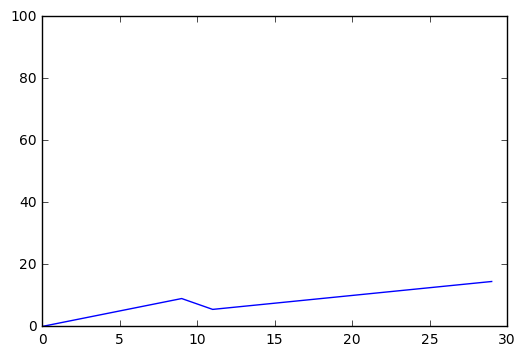

In [24]:
import matplotlib.pyplot as plt
x = range(10)
y = range(10)
fig, ax = plt.subplots()

ax.set_ylim(0, 100)
ax.plot(x, y)
for i in range(11,30):
    x.append(i)
    y.append(i*0.5)
    ax.lines[0].set_xdata(x)
    ax.lines[0].set_ydata(y)
    ax.relim()
    ax.autoscale_view()
    plt.pause(0.5)

关于这个问题的讨论，参见

1. [Remove false deprication warning #8501](https://github.com/matplotlib/matplotlib/issues/8501)
2. [Implement blocking Qt event loop. #8185](https://github.com/matplotlib/matplotlib/pull/8185)

其中 #8185 称已经解决了该问题，所以是没有更新的缘故？【好像确实是没有更新的缘故，之前`matplotlib`的版本号为1.5.3，现在为2.2.2】

## 横轴为时间

refer to [Editing the date formatting of x-axis tick labels in matplotlib](https://stackoverflow.com/questions/14946371/editing-the-date-formatting-of-x-axis-tick-labels-in-matplotlib) 

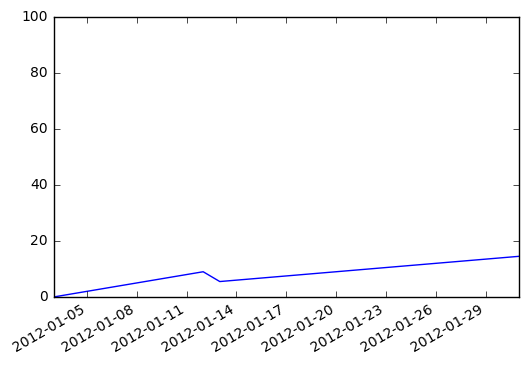

In [25]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
x = [datetime(2012,1,i+3) for i in range(10)]
y = range(10)
fig, ax = plt.subplots()
myFmt = DateFormatter("%Y-%m-%d")
## Rotate date labels automatically
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylim(0, 100)
ax.plot(x, y)
fig.autofmt_xdate()
for i in range(11,30):
    x.append(x[-1]+timedelta(days=1))
    y.append(i*0.5)
    ax.lines[0].set_xdata(x)
    ax.lines[0].set_ydata(y)
    ax.relim()
    ax.autoscale_view()    
    plt.pause(0.5)

## 多条曲线

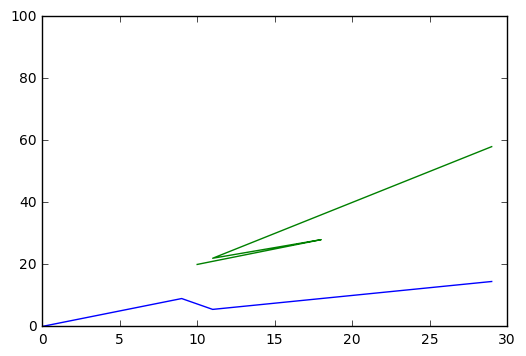

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_ylim(0, 100)
x = range(10)
y = range(10)
x2 = range(10, 19) # different length
y2 = range(20, 29)
#ax.plot(x,y,x2,y2)
ax.plot(x,y)
#x2 = []
#y2 = []
ax.plot(x2,y2)
for i in range(11,30):
    x.append(i)
    y.append(i*0.5)
    x2.append(i)
    y2.append(i*2)
    ax.lines[0].set_xdata(x)
    ax.lines[0].set_ydata(y)
    ax.lines[1].set_xdata(x2)
    ax.lines[1].set_ydata(y2)
    ax.relim()
    ax.autoscale_view()
    plt.pause(0.5)

## 两个不同的纵轴尺度

refer to [api example code: two_scales.py](https://matplotlib.org/examples/api/two_scales.html) for more details.

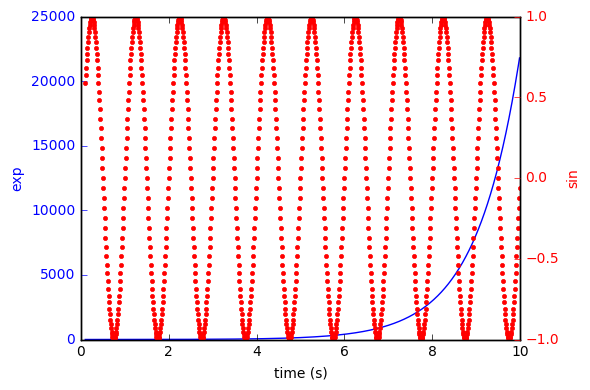

In [29]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
t = np.arange(0.10, 10.0, 0.01)
s1 = np.exp(t)
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
s2 = np.sin(2*np.pi*t)
ax2.plot(t, s2, 'r.')
ax2.set_ylabel('sin', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()